# Final Project - Capstone
# Teamname - The SQL Scoundrel

====================================================================================================================================
# EDA & Cleanup.
So I have chosen to do my project on Environmentalism.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from arch.unitroot import ADF

# ARIMA library
import pmdarima as pm

In [2]:
# Read CSV's
df_energy       = pd.read_csv('owid-energy.csv', parse_dates = ['year'])
df_pollution    = pd.read_csv('owid-pollusion.csv', parse_dates = ['Year']) # Changed the long column names on the csv as it was easier.
df_co2          = pd.read_csv('owid-co2.csv', parse_dates = ['year'])
df_population   = pd.read_csv('population.csv', parse_dates = ['Year'])
df_gdp          = pd.read_csv('maddison-gdp.csv', parse_dates = ['Year'])

This is our largest table and needs to be sorted into the few countries we wish to look at as well as sorting the types into green and non-green energy types. down to a total of 8 columns.

In [3]:
df_energy

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900-01-01,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901-01-01,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902-01-01,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903-01-01,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904-01-01,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21885,Zimbabwe,2017-01-01,ZWE,14751101.0,2.194784e+10,NaN,NaN,NaN,NaN,21.693,...,0.136,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21886,Zimbabwe,2018-01-01,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21887,Zimbabwe,2019-01-01,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21888,Zimbabwe,2020-01-01,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


This table shows the international-$ using 2011 prices for most countries from 1950.

In [4]:
df_population

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population at age 1,Population aged 1 to 4 years,...,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
0,Afghanistan,1950-01-01,7480464,301735.0,1248282,3068855,4494349,4198587,258652.02,946547.0,...,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951-01-01,7571542,299368.0,1246857,3105444,4552138,4250002,254304.00,947489.0,...,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952-01-01,7667534,305393.0,1248220,3145070,4613604,4303436,252906.00,942827.0,...,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953-01-01,7764549,311574.0,1254725,3186382,4676232,4356242,258717.02,943151.0,...,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954-01-01,7864289,317584.0,1267817,3231060,4741371,4408474,264765.00,950233.0,...,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,Zimbabwe,2017-01-01,14751101,464521.0,2287404,6217928,9224369,8056253,457422.00,1822883.0,...,1690993,2422873,2021973,1088878,570769,467775,200927,59789,8974,222.0
18284,Zimbabwe,2018-01-01,15052191,466524.0,2283576,6291632,9385132,8264833,457587.00,1817052.0,...,1732035,2474502,2058928,1155537,585529,476214,208587,59700,9299,228.0
18285,Zimbabwe,2019-01-01,15354606,468844.0,2281740,6367398,9543409,8473475,459748.00,1812896.0,...,1759205,2546398,2085636,1220993,606266,479827,218763,60339,9546,235.0
18286,Zimbabwe,2020-01-01,15669663,470340.0,2287105,6449021,9709135,8691594,462625.00,1816765.0,...,1776240,2640150,2101852,1291333,631541,476507,231604,61546,9629,240.0


This table shows the deaths per year of different types of problems since 1990.

In [5]:
df_pollution

,Entity,Code,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alcohol use,Diet low in fruits,Unsafe water source,...,High body-mass,Unsafe sanitation,No access to handwashing facility,Drug use,Low bone mineral density,Vitamin A deficiency,Child stunting,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency
0,Afghanistan,AFG,1990-01-01,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991-01-01,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992-01-01,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993-01-01,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994-01-01,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015-01-01,2835,11483,1063,1354,4854,1820,4336,...,5636,2879,4328,1068,407,138,730,21,734,282
6836,Zimbabwe,ZWE,2016-01-01,2781,11663,1082,1383,4915,1854,4244,...,5849,2798,4295,1042,415,101,674,20,700,275
6837,Zimbabwe,ZWE,2017-01-01,2700,11819,1098,1409,4992,1883,4193,...,6047,2744,4251,1007,424,82,629,19,678,267
6838,Zimbabwe,ZWE,2018-01-01,2669,12002,1117,1439,5044,1917,4013,...,6248,2608,4153,969,434,85,607,17,644,261


Documentation for what these columns mean can be found here <https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv>
We only want total_ghg for this project even though if the scope was larger multiple of these would be interesting to use.

In [6]:
df_co2

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850-01-01,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851-01-01,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852-01-01,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853-01-01,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854-01-01,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017-01-01,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018-01-01,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019-01-01,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020-01-01,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [7]:
# Null counts
print(df_population.isnull().sum())
print('===========================================')
print(df_energy.isnull().sum())
print('===========================================')
print(df_co2.isnull().sum())
print('===========================================')
print(df_pollution.isnull().sum())

Country name                                  0
Year                                          0
Population                                    0
Population of children under the age of 1     0
Population of children under the age of 5     0
Population of children under the age of 15    0
Population under the age of 25                0
Population aged 15 to 64 years                0
Population at age 1                           0
Population aged 1 to 4 years                  0
Population aged 5 to 9 years                  0
Population aged 10 to 14 years                0
Population aged 15 to 19 years                0
Population aged 20 to 29 years                0
Population aged 30 to 39 years                0
Population aged 40 to 49 years                0
Population aged 50 to 59 years                0
Population aged 60 to 69 years                0
Population aged 70 to 79 years                0
Population aged 80 to 89 years                0
Population aged 90 to 99 years          

GDP and Pollution deaths are the only tables that have no nulls in them, we expected the other two to have a large number of nulls due to the nature of the tables and that some columns didnt exist at certain times. Also note on the energy dataframe we see wind energy has a lot of nulls because the technology might not have been incorporated nationwide until recently so those nulls can be replaced with 0.

In [8]:
# Type checking
print(df_energy.dtypes)
print('===========================================')
print(df_population.dtypes)
print('===========================================')
print(df_pollution.dtypes)
print('===========================================')
print(df_co2.dtypes)

country                           object
year                      datetime64[ns]
iso_code                          object
population                       float64
gdp                              float64
                               ...      
wind_elec_per_capita             float64
wind_electricity                 float64
wind_energy_per_capita           float64
wind_share_elec                  float64
wind_share_energy                float64
Length: 129, dtype: object
Country name                                          object
Year                                          datetime64[ns]
Population                                             int64
Population of children under the age of 1            float64
Population of children under the age of 5              int64
Population of children under the age of 15             int64
Population under the age of 25                         int64
Population aged 15 to 64 years                         int64
Population at age 1               

===================================================================================================================================
# Organising The Dataframes

# Energy DF

Energy DF:
countries to use:
USA
Europe
Africa
Asia

GREEN:
Biofuel
Other renewables
Solar
Wind
Hydro
Nuclear

NON GREEN:
Coal
Gas
Oil

Note - green and non-green will be split into these two categories:
consumption
energy_per_capita

These are the isolated columns that are also useful.
greenhouse_gas_emissions
primary_energy_consumption

NOTE:
Low carbon is the sum of renewables and nuclear so is omitted. Same for Fossil Fuel on the non-green side

In [9]:
# Energy needs to be grouped into green and non-green types and then sorted into 9 columns
country_list = ['United States', 'Asia', 'Europe', 'Africa', 'India']
df_energy = df_energy[df_energy['country'].isin(country_list)]

In [10]:
df_energy = df_energy.fillna(0) # We need to fill the nulls in for the time series and any value that is null especially for green power is likely to be a 0 as the tech didn't exist back then let alone implemented as for other methods the power consumption just isn't recorded we will be truncating this to match when we do have data available to use in our model.

In [11]:
# Add the rows together (I understand this might not be ideal but given the historical way these were implicated any nulls in these are most likely to mean 0)
df_energy['green_consumption'] = (df_energy['biofuel_consumption'] + df_energy['hydro_consumption'] + df_energy['nuclear_consumption']
                                  + df_energy['other_renewable_consumption'] + df_energy['renewables_consumption'] + df_energy['solar_consumption'] + df_energy['wind_consumption']  )

df_energy['green_energy_per_capita'] = (df_energy['other_renewables_energy_per_capita'] + df_energy['hydro_energy_per_capita'] + df_energy['nuclear_energy_per_capita']
                                        + df_energy['renewables_energy_per_capita'] + df_energy['solar_energy_per_capita'] + df_energy['wind_energy_per_capita']
                                        # This one didn't follow the same naming convention for some reason
                                        + df_energy['biofuel_cons_per_capita'])

df_energy['non-green_consumption'] = (df_energy['coal_consumption']
                                      + df_energy['gas_consumption'] + df_energy['oil_consumption'])

df_energy['non-green_energy_per_capita'] = (df_energy['coal_cons_per_capita'] # Same issue as green with naming convention.
                                            + df_energy['gas_energy_per_capita'] + df_energy['oil_energy_per_capita'])


In [12]:
df_energy = df_energy[['country', 'year', 'green_consumption', 'green_energy_per_capita', 'non-green_consumption', 'non-green_energy_per_capita', 'primary_energy_consumption']]
df_energy # Notice how all the stats start at 1965 this is good as we can truncate our df more to the values we know. (note greenhouse gas emissions are known from 2000 instead)

,country,year,green_consumption,green_energy_per_capita,non-green_consumption,non-green_energy_per_capita,primary_energy_consumption
122,Africa,1900-01-01,0.000,0.000,0.000,0.000,0.000
123,Africa,1901-01-01,0.000,0.000,0.000,0.000,0.000
124,Africa,1902-01-01,0.000,0.000,0.000,0.000,0.000
125,Africa,1903-01-01,0.000,0.000,0.000,0.000,0.000
126,Africa,1904-01-01,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...
20669,United States,2017-01-01,6853.637,20781.745,21310.290,64617.516,25819.031
20670,United States,2018-01-01,6955.374,20941.088,22206.337,66858.363,26762.473
20671,United States,2019-01-01,7105.572,21253.824,21941.309,65629.725,26571.660
20672,United States,2020-01-01,7275.834,21658.007,19907.602,59259.046,24593.223


In [13]:
# truncate the year to start at 1965
df_energy = df_energy[df_energy['year'] >= '1965-01-01']
df_energy['year'] = pd.to_datetime(df_energy['year']).dt.to_period('Y')

C:\Users\bradl\AppData\Local\Temp\ipykernel_18056\547173313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy['year'] = pd.to_datetime(df_energy['year']).dt.to_period('Y')


In [14]:
# Setting the index ready for time series
df_energy.set_index('year', inplace=True, drop=True)
df_energy.index = df_energy.index.to_timestamp()

In [15]:
df_energy

,country,green_consumption,green_energy_per_capita,non-green_consumption,non-green_energy_per_capita,primary_energy_consumption
year,,,,,,
1965-01-01,Africa,82.238,255.836,674.303,2097.708,715.422
1966-01-01,Africa,91.726,278.246,703.279,2133.357,749.142
1967-01-01,Africa,95.752,283.154,708.963,2096.530,756.838
1968-01-01,Africa,112.000,322.788,743.402,2142.490,799.402
1969-01-01,Africa,130.704,367.074,756.058,2123.337,821.410
...,...,...,...,...,...,...
2017-01-01,United States,6853.637,20781.745,21310.290,64617.516,25819.031
2018-01-01,United States,6955.374,20941.088,22206.337,66858.363,26762.473
2019-01-01,United States,7105.572,21253.824,21941.309,65629.725,26571.660


# Co2 DF

In [16]:
# Co2 select the 3 columns needed
df_co2 = df_co2[['country', 'year', 'total_ghg']]
df_co2 = df_co2[df_co2['country'].isin(country_list)]

In [17]:
 # 1990 start dates to truncate
df_co2 = df_co2[(df_co2['year'] >= '1990-01-01') & (df_co2['year'] < '2020-01-01')] # Noticed the nulls for 2020 and 2021 this doesn't really matter due to the fact that we are predicting until 2050 anyway.
df_co2['year'] = pd.to_datetime(df_co2['year']).dt.to_period('Y')

In [18]:
df_co2.set_index('year', inplace=True, drop=True)
df_co2.index = df_co2.index.to_timestamp()

In [19]:
df_co2

,country,total_ghg
year,,
1990-01-01,Africa,2148.50
1991-01-01,Africa,2215.11
1992-01-01,Africa,2237.26
1993-01-01,Africa,2267.39
1994-01-01,Africa,2357.19
...,...,...
2015-01-01,United States,5665.21
2016-01-01,United States,5743.85
2017-01-01,United States,5689.61


# Pollution DF

In [20]:
# df_pollution sorting.
df_pollution = df_pollution.rename(columns={'Entity' : 'country', 'Year' : 'year'})
df_pollution = df_pollution[['country', 'year', 'Outdoor air pollution', 'Air pollution', 'High body-mass', 'Unsafe water source']]

In [21]:
pol_country = ['World',
               'India',
               'United States',
               'United Kingdom',
               'China']

df_pollution = df_pollution[df_pollution['country'].isin(pol_country)]

In [22]:
df_pollution['year'] = pd.to_datetime(df_pollution['year']).dt.to_period('Y')
df_pollution.set_index('year', inplace=True, drop=True)
df_pollution.index = df_pollution.index.to_timestamp()

In [23]:
df_pollution

,country,Outdoor air pollution,Air pollution,High body-mass,Unsafe water source
year,,,,,
1990-01-01,China,626744,1895767,234998,75817
1991-01-01,China,649288,1896715,241216,70793
1992-01-01,China,679077,1898568,248473,63643
1993-01-01,China,706222,1893795,256553,57228
1994-01-01,China,732454,1874478,262951,52057
...,...,...,...,...,...
2015-01-01,World,4191433,6638067,4423170,1363038
2016-01-01,World,4218230,6605030,4563131,1327637
2017-01-01,World,4238086,6564255,4683247,1319414


# Population DF

In [24]:
df_population = df_population.rename(columns={'Country name' : 'country', 'Year' : 'year', 'Population' : 'population'})
df_population = df_population[['country', 'year', 'population']]

In [25]:
pop_country = ['Africa (UN)', 'Asia (UN)', 'Europe (UN)', 'India', 'North America (UN)', 'World']
df_population = df_population[df_population['country'].isin(pop_country)]

In [26]:
df_population['year'] = pd.to_datetime(df_population['year']).dt.to_period('Y')
df_population.set_index('year', inplace=True, drop=True)
df_population.index = df_population.index.to_timestamp()

In [27]:
df_population

,country,population
year,,
1950-01-01,Africa (UN),227549260
1951-01-01,Africa (UN),232484000
1952-01-01,Africa (UN),237586060
1953-01-01,Africa (UN),242837440
1954-01-01,Africa (UN),248244770
...,...,...
2017-01-01,World,7599822300
2018-01-01,World,7683790000
2019-01-01,World,7764951000


# GDP DF

In [28]:
df_gdp = pd.read_csv('maddison-gdp.csv', parse_dates = ['Year'])
df_gdp = df_gdp.rename(columns={'Entity' : 'country', 'Year' : 'year', 'GDP per capita' : 'gdp_per_capita'})
df_gdp = df_gdp[['country', 'year', 'gdp_per_capita']]

In [29]:
df_gdp['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia', 'Eastern Europe', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Finland', 'Former Sudan', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary',
       'Ice

In [30]:
gdp_countries = ['China', 'United States', 'India', 'United Kingdom']
df_gdp = df_gdp[df_gdp['country'].isin(gdp_countries)]

Given the limitation of pandas timestamp (we have sates starting at 1000) The solution is to trim our dataframe to something within the timeframe
pd.Timestamp.min -> Timestamp('1677-09-21 00:12:43.145224193')

In [31]:
df_gdp = df_gdp[df_gdp['year'] >= '1950']
df_gdp['year'] = pd.to_datetime(df_gdp['year']).dt.to_period('Y')
df_gdp.set_index('year', inplace=True, drop=True)
df_gdp.index = df_gdp.index.to_timestamp()

In [32]:
df_gdp

,country,gdp_per_capita
year,,
1950-01-01,China,799.00
1951-01-01,China,950.00
1952-01-01,China,1047.00
1953-01-01,China,1157.00
1954-01-01,China,1049.00
...,...,...
2014-01-01,United States,51664.00
2015-01-01,United States,52591.00
2016-01-01,United States,53015.00


===================================================================================================================================
# Time series Test

In [33]:
df_population

,country,population
year,,
1950-01-01,Africa (UN),227549260
1951-01-01,Africa (UN),232484000
1952-01-01,Africa (UN),237586060
1953-01-01,Africa (UN),242837440
1954-01-01,Africa (UN),248244770
...,...,...
2017-01-01,World,7599822300
2018-01-01,World,7683790000
2019-01-01,World,7764951000


In [34]:
# Testing with population for a first run to test multiple countries with one column.
i = 'Africa (UN)'
df = df_population[df_population['country'] == i]
df = df[['population']]
df.sort_index(inplace=True, ascending=True)

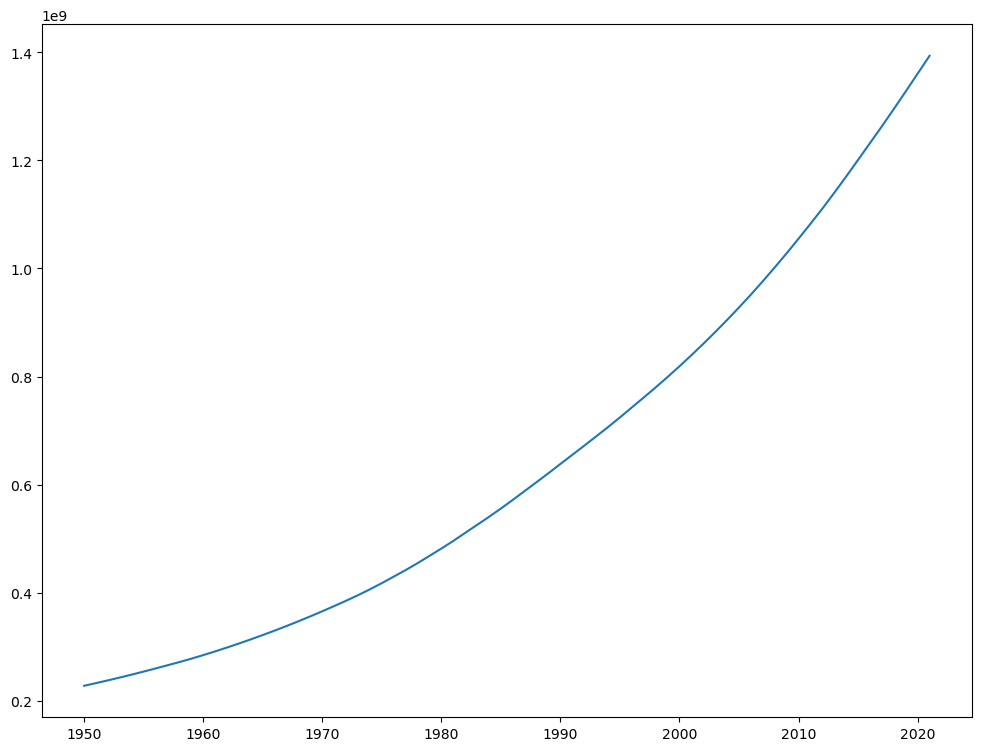

In [35]:
pd.plotting.register_matplotlib_converters()
plt.figure(figsize=(12,9))
plt.plot(df['population'])
plt.show()

In [36]:
# Auto-correlation
df['lag_1'] = df['population'].shift(1)
df['lag_2'] = df['population'].shift(2)
df['lag_3'] = df['population'].shift(3)

In [37]:
df.corr()

,population,lag_1,lag_2,lag_3
population,1.000000,0.999997,0.999987,0.999971
lag_1,0.999997,1.000000,0.999997,0.999987
lag_2,0.999987,0.999997,1.000000,0.999997
lag_3,0.999971,0.999987,0.999997,1.000000


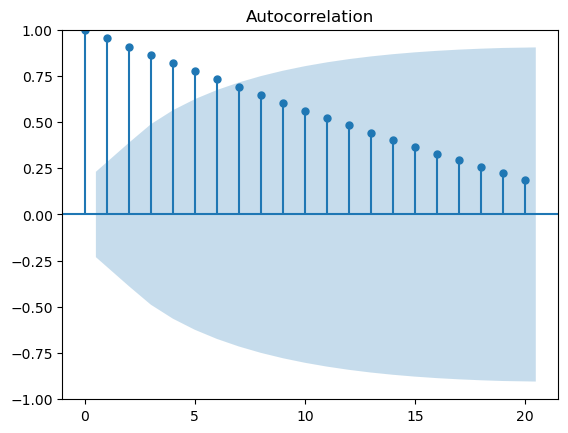

In [38]:
plot_acf(df['population'], lags = 20);

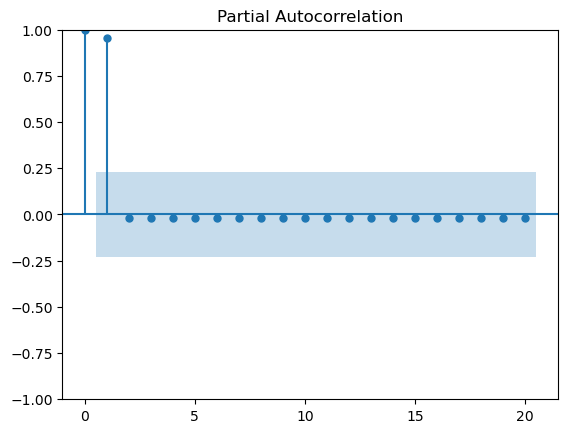

In [39]:
plot_pacf(df['population'], method='ywm', lags = 20); # finding p

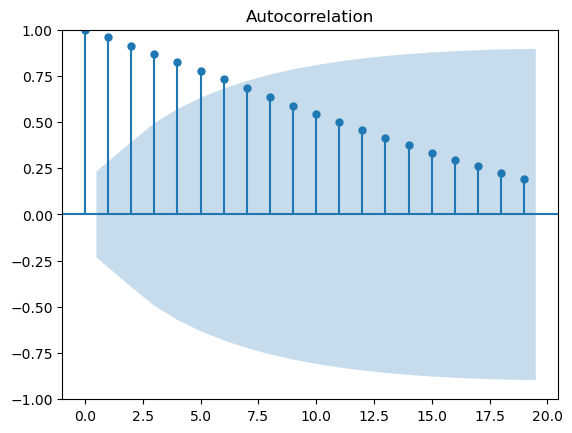

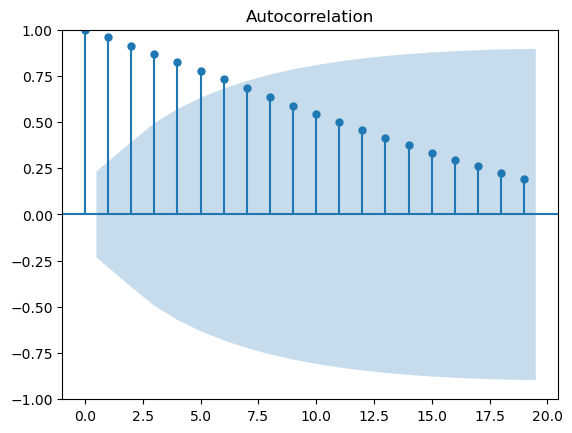

In [40]:
plot_acf(df.population.diff().dropna()) # finding q

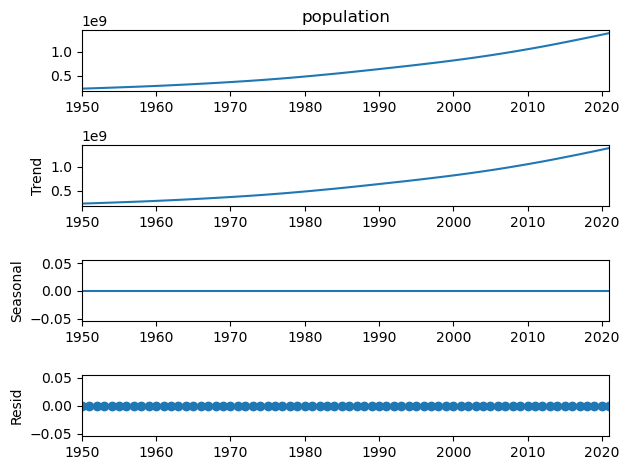

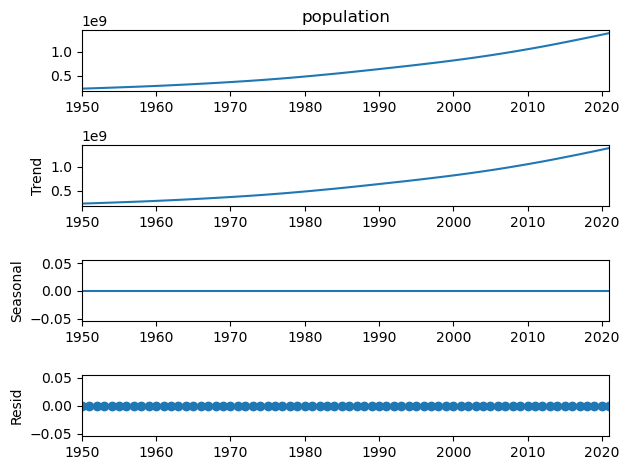

In [41]:
sede = seasonal_decompose(df['population'])
sede.plot()

In [42]:
max_lags = int(np.sqrt(df.shape[0]))
ADF(df.population.dropna(), trend = 'ctt', max_lags = max_lags).summary()

Test Statistic,-1.054
P-value,0.985
Lags,8


In [43]:
ADF(df.population.diff().dropna(), trend = 'ctt', max_lags = max_lags).summary()

Test Statistic,-5.321
P-value,0.000
Lags,7


In [44]:
ADF(df.population.diff().diff().dropna(), trend = 'ctt', max_lags = max_lags).summary()

Test Statistic,-1.785
P-value,0.887
Lags,8


In [45]:
ADF(df.population.diff().diff().diff().diff().dropna(), trend = 'ctt', max_lags = max_lags).summary()

Test Statistic,-7.841
P-value,0.000
Lags,6


In [46]:
d = 1
p = 1
q = 2

In [47]:
df

,population,lag_1,lag_2,lag_3
year,,,,
1950-01-01,227549260,NaN,NaN,NaN
1951-01-01,232484000,2.275493e+08,NaN,NaN
1952-01-01,237586060,2.324840e+08,2.275493e+08,NaN
1953-01-01,242837440,2.375861e+08,2.324840e+08,2.275493e+08
1954-01-01,248244770,2.428374e+08,2.375861e+08,2.324840e+08
...,...,...,...,...
2017-01-01,1263333800,1.232112e+09,1.201108e+09,1.170299e+09
2018-01-01,1295265000,1.263334e+09,1.232112e+09,1.201108e+09
2019-01-01,1327701100,1.295265e+09,1.263334e+09,1.232112e+09


In [48]:
# predictions
ar1 = ARIMA(df[['population']], order=(p, d, q)).fit()
predictions = ar1.predict(start=70, end=100) # df starts from 1950 and ends at 2021
predictions

C:\Users\bradl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\bradl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\bradl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\bradl\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\bradl\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimi

2020-01-01    1.344299e+09
2021-01-01    1.377491e+09
2022-01-01    1.410678e+09
2023-01-01    1.426952e+09
2024-01-01    1.443225e+09
2025-01-01    1.459499e+09
2026-01-01    1.475773e+09
2027-01-01    1.492046e+09
2028-01-01    1.508319e+09
2029-01-01    1.524592e+09
2030-01-01    1.540865e+09
2031-01-01    1.557137e+09
2032-01-01    1.573410e+09
2033-01-01    1.589682e+09
2034-01-01    1.605954e+09
2035-01-01    1.622226e+09
2036-01-01    1.638498e+09
2037-01-01    1.654769e+09
2038-01-01    1.671040e+09
2039-01-01    1.687311e+09
2040-01-01    1.703582e+09
2041-01-01    1.719853e+09
2042-01-01    1.736124e+09
2043-01-01    1.752394e+09
2044-01-01    1.768664e+09
2045-01-01    1.784934e+09
2046-01-01    1.801204e+09
2047-01-01    1.817473e+09
2048-01-01    1.833743e+09
2049-01-01    1.850012e+09
2050-01-01    1.866281e+09
Freq: AS-JAN, Name: predicted_mean, dtype: float64

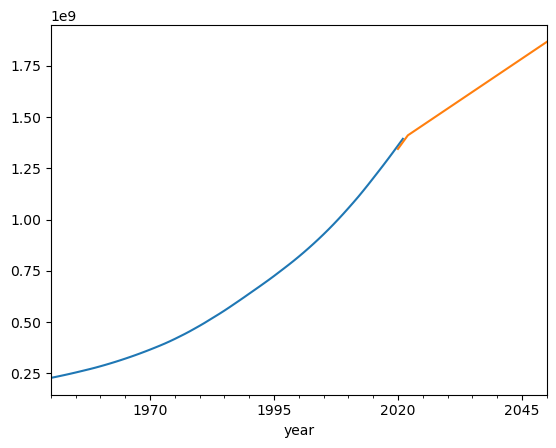

In [49]:
ax = df.population.plot(x= 'year', y='population')
predictions.plot(ax = ax)

plt.show()

# Trying a new test
testing for auto arima as finding pdq is a lot of work

In [50]:
df_population['country'].unique()

array(['Africa (UN)', 'Asia (UN)', 'Europe (UN)', 'India', 'World'],
      dtype=object)

In [51]:
# use the same df as before
i = 'Europe (UN)'
df = df_population[df_population['country'] == i]
df = df[['population']]
df = df[df.index < '2019-01-01']
df.sort_index(inplace = True, ascending = True)

In [52]:
# Fit the ARIMA model with auto generated parameters and use the seasonal component.
model = pm.auto_arima(df, seasonal = False, stepwise = True) # Set number of points to forecast as h
h = 100 # Generate a forecast
forecast = model.predict(h)
print([i for i in model.params()])

[-58627.46268656717, 54702052054.756065]


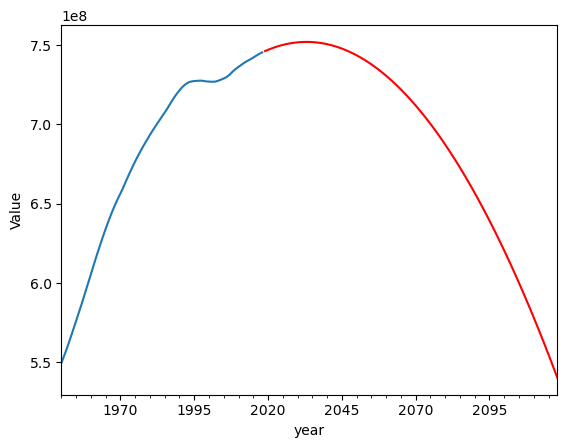

In [53]:
# Visualize forecast with training data
# Slice the x-axis to only plot the training data as the color black
ax = df.population.plot(x = 'year', y = 'population')
forecast.plot(ax = ax, c = 'r') # Slice the x-axis to plot our forecast after the training data as the color red

# Set axis labels
plt.xlabel('year')
plt.ylabel('Value')
plt.show()

# More testing
This time with emissions!

In [54]:
df = df_co2
df['country'].unique()

array(['Africa', 'Asia', 'Europe', 'India', 'United States'], dtype=object)

In [55]:
df

,country,total_ghg
year,,
1990-01-01,Africa,2148.50
1991-01-01,Africa,2215.11
1992-01-01,Africa,2237.26
1993-01-01,Africa,2267.39
1994-01-01,Africa,2357.19
...,...,...
2015-01-01,United States,5665.21
2016-01-01,United States,5743.85
2017-01-01,United States,5689.61


In [56]:
# use the same df as before
i = 'Asia'
df = df_co2[df_co2['country'] == i]
df = df[['total_ghg']]
df.sort_index(inplace=True, ascending=True)

In [57]:
j = 'United States'
df2 = df_co2[df_co2['country'] == j]
df2 = df2[['total_ghg']]
df2.sort_index(inplace=True, ascending=True)

In [58]:
# Fit the ARIMA model with auto generated parameters and use the seasonal component.
model = pm.auto_arima(df, seasonal=False, stepwise=True)  # Set number of points to forecast as h
h = 30  # Generate a forecast
forecast = model.predict(h)

In [59]:
model2 = pm.auto_arima(df2, seasonal=False, stepwise=True)  # Set number of points to forecast as h
h = 30  # Generate a forecast
forecast2 = model2.predict(h)

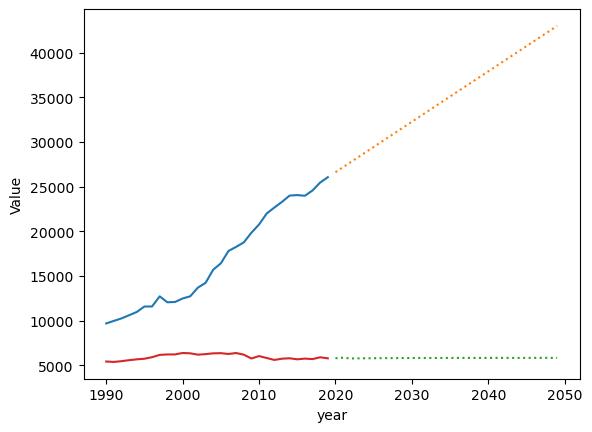

In [60]:
plt.plot(df.total_ghg)
plt.plot(forecast, ls = ':')
plt.plot(forecast2, ls = ':')
plt.plot(df2.total_ghg)

# Set axis labels
plt.xlabel('year')
plt.ylabel('Value')
plt.show()

===================================================================================================================================
# Time Series For Real*
Starting with Co2 dataframe. results may vary and be reworked later!

In [61]:
df = df_co2
countries = [i for i in df['country'].unique()]
columns = [i for i in df.columns if i != 'country']

In [62]:
print(countries)
print(columns)

['Africa', 'Asia', 'Europe', 'India', 'United States']
['total_ghg']


In [63]:
def weatherman(df):
    df = df[df['country'] == j]
    df = df[[i]]
    df.sort_index(inplace=True, ascending=True) # makes sure the

    model = pm.auto_arima(df, seasonal=False, stepwise=True)  # Set number of points to forecast as h
    h = 30  # Generate a forecast
    forecast = model.predict(h)

    return df, forecast

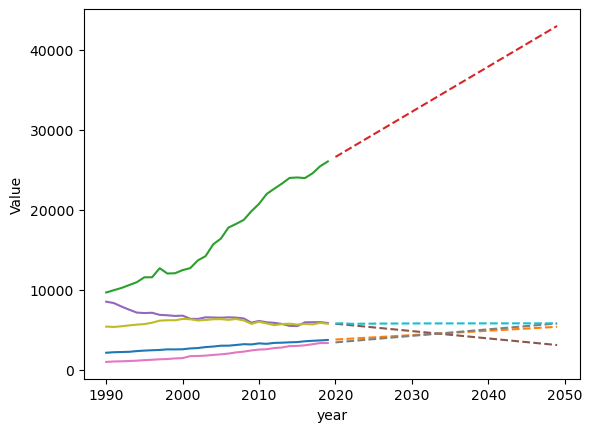

In [64]:
for i in columns: # column
    for j in countries: # country
        df_plot, forecast = weatherman(df)
        plt.plot(df_plot[i])
        plt.plot(forecast, ls = 'dashed')
    plt.xlabel('year')
    plt.ylabel('Value')
    plt.show()

# Scaling up to the other Dataframes
Let's start with the biggest because scaling things up blindly has never gone wrong in the past!

This section I clean up the loops test they are functional for multiple countries and columns. I also fix the colours together and add a key to the diagrams. Its now a case of putting in the dataframes and putting them in the presentation. This concludes the coding aspect of the project.

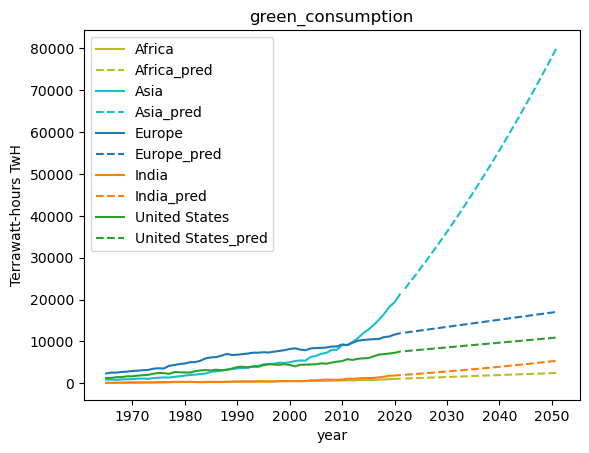

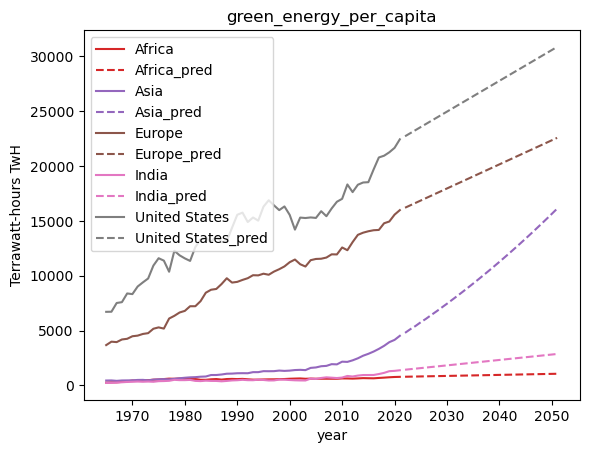

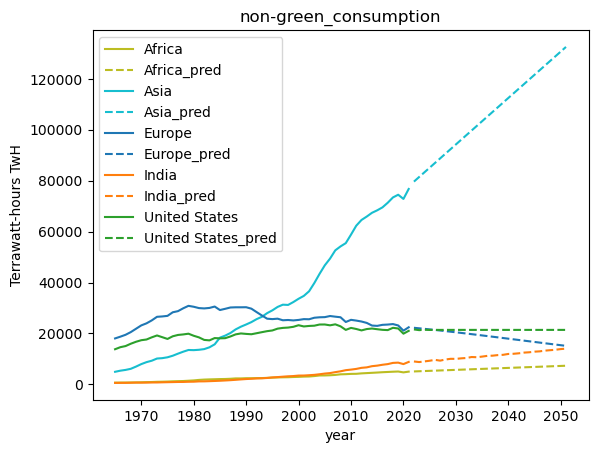

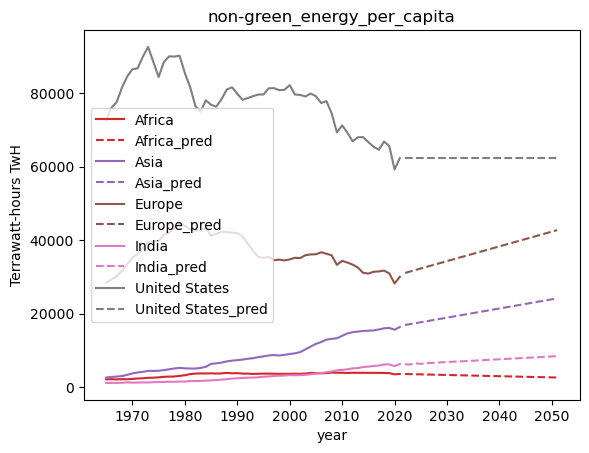

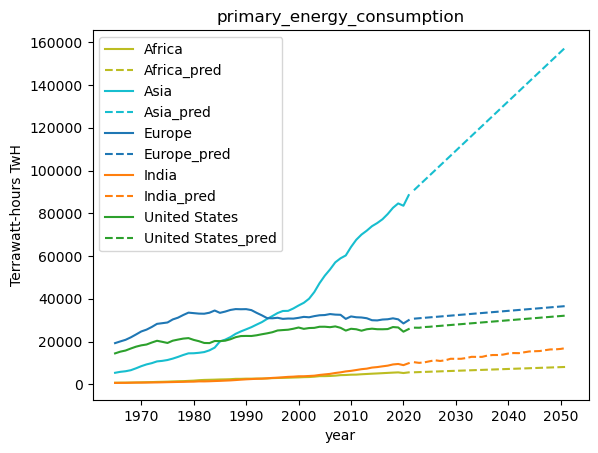

In [75]:
df = df_energy # Change this for any main df in this notebook.
countries = [i for i in df['country'].unique()]
columns = [i for i in df.columns if i != 'country']
legend_country = [i if j == 0 else i + str('_pred') for i in df['country'].unique() for j in range(2)]

for i in columns: # column
    for j in countries: # country
        df_plot, forecast = weatherman(df) # calls the forcasting function
        colour = next(ax._get_lines.prop_cycler)['color'] # on today's episode of Americans cant spell!
        plt.plot(df_plot[i], c = colour)
        plt.plot(forecast, ls = 'dashed', c = colour)

    plt.legend(legend_country)
    plt.title(i)
    plt.xlabel('year')
    plt.ylabel('Terrawatt-hours TwH')
    plt.show()

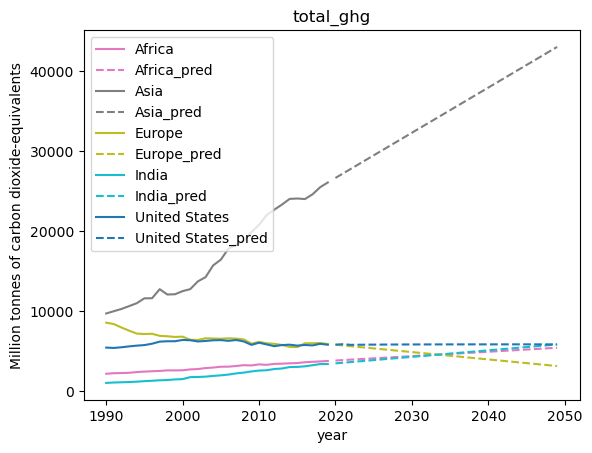

In [67]:
df = df_co2  # Change this for any main df in this notebook.
countries = [i for i in df['country'].unique()]
columns = [i for i in df.columns if i != 'country']
legend_country = [i if j == 0 else i + str('_pred') for i in df['country'].unique() for j in range(2)]
for i in columns:  # column
    for j in countries:  # country
        df_plot, forecast = weatherman(df)  # calls the forcasting function
        colour = next(ax._get_lines.prop_cycler)['color']  # on today's episode of Americans cant spell!
        plt.plot(df_plot[i], c=colour)
        plt.plot(forecast, ls='dashed', c=colour)

    plt.legend(legend_country)
    plt.title(i)
    plt.xlabel('year')
    plt.ylabel('Million tonnes of carbon dioxide-equivalents')
    plt.show()

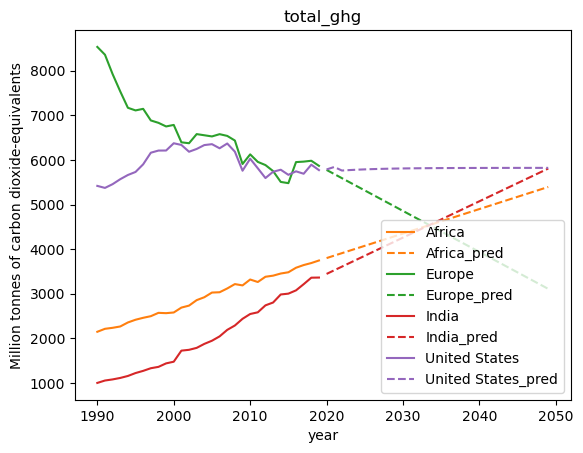

In [68]:
df = df_co2  # Change this for any main df in this notebook.
df = df[df['country'] != 'Asia']
countries = [i for i in df['country'].unique()]
columns = [i for i in df.columns if i != 'country']
legend_country = [i if j == 0 else i + str('_pred') for i in df['country'].unique() for j in range(2)]
for i in columns:  # column
    for j in countries:  # country
        df_plot, forecast = weatherman(df)  # calls the forcasting function
        colour = next(ax._get_lines.prop_cycler)['color']  # on today's episode of Americans cant spell!
        plt.plot(df_plot[i], c=colour)
        plt.plot(forecast, ls='dashed', c=colour)

    plt.legend(legend_country)
    plt.title(i)
    plt.xlabel('year')
    plt.ylabel('Million tonnes of carbon dioxide-equivalents')
    plt.show()

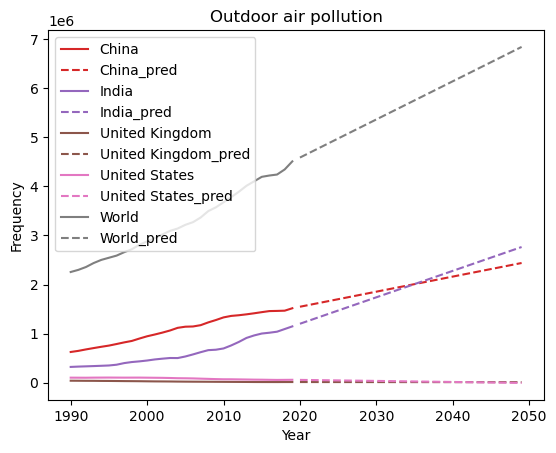

C:\Users\bradl\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,1,2)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\bradl\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\bradl\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\bradl\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\bradl\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\bradl\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Us

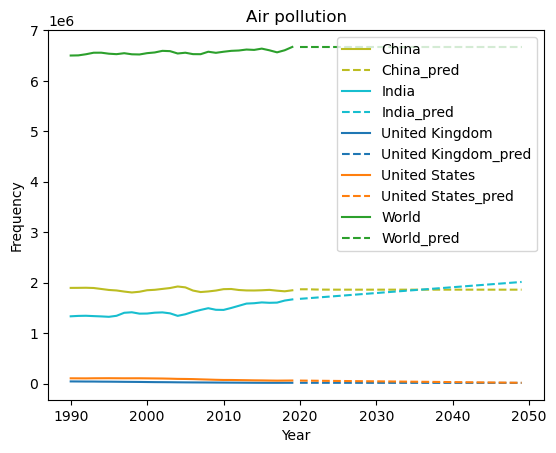

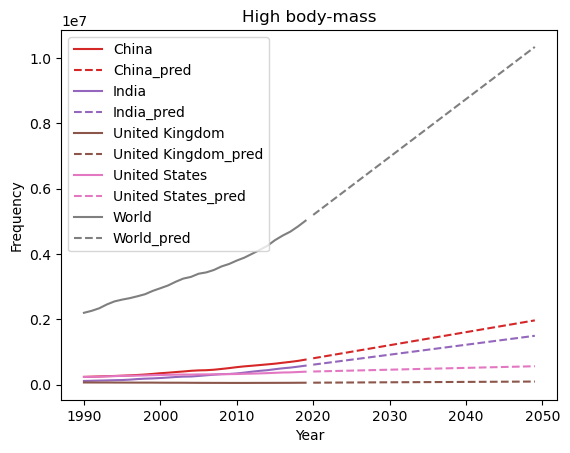

C:\Users\bradl\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,2,2)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\bradl\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\bradl\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\bradl\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\bradl\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\bradl\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Us

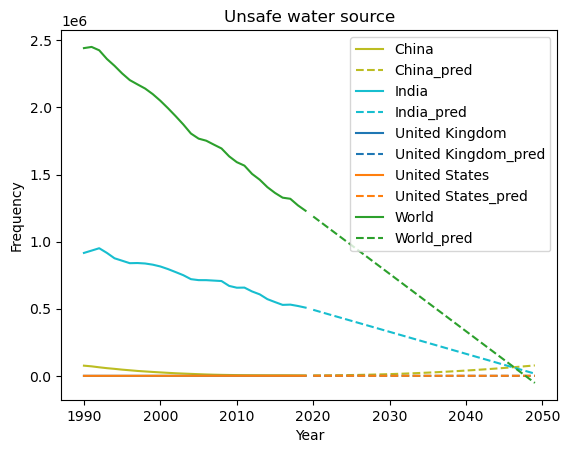

In [76]:
df = df_pollution  # Change this for any main df in this notebook.
countries = [i for i in df['country'].unique()]
columns = [i for i in df.columns if i != 'country']
legend_country = [i if j == 0 else i + str('_pred') for i in df['country'].unique() for j in range(2)]
for i in columns:  # column
    for j in countries:  # country
        df_plot, forecast = weatherman(df)  # calls the forcasting function
        colour = next(ax._get_lines.prop_cycler)['color']  # on today's episode of Americans cant spell!
        plt.plot(df_plot[i], c=colour)
        plt.plot(forecast, ls='dashed', c=colour)

    plt.legend(legend_country)
    plt.title(i)
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.show()

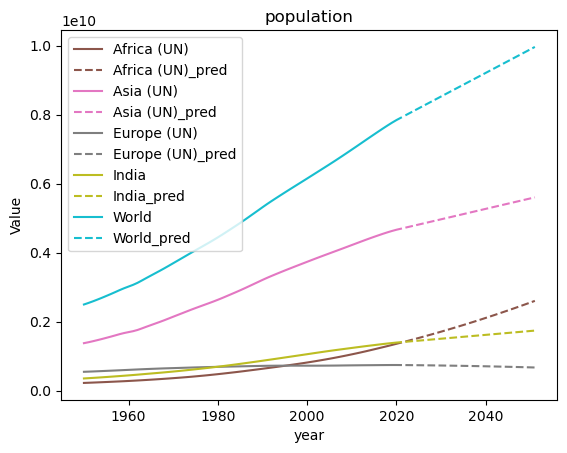

In [70]:
df = df_population  # Change this for any main df in this notebook.
countries = [i for i in df['country'].unique()]
columns = [i for i in df.columns if i != 'country']
legend_country = [i if j == 0 else i + str('_pred') for i in df['country'].unique() for j in range(2)]
for i in columns:  # column
    for j in countries:  # country
        df_plot, forecast = weatherman(df)  # calls the forcasting function
        colour = next(ax._get_lines.prop_cycler)['color']  # on today's episode of Americans cant spell!
        plt.plot(df_plot[i], c=colour)
        plt.plot(forecast, ls='dashed', c=colour)

    plt.legend(legend_country)
    plt.title(i)
    plt.xlabel('year')
    plt.ylabel('Value')
    plt.show()

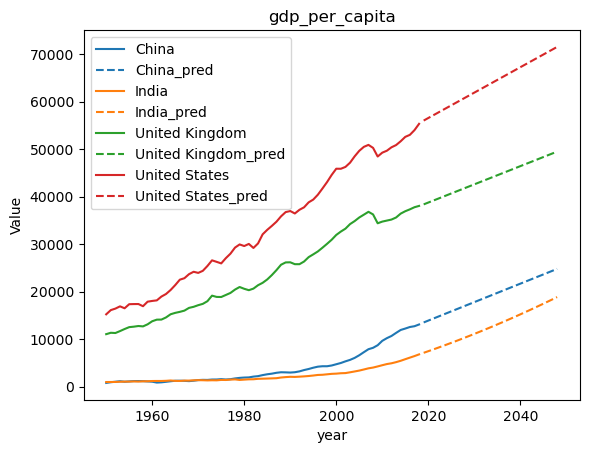

In [71]:
df = df_gdp  # Change this for any main df in this notebook.
countries = [i for i in df['country'].unique()]
columns = [i for i in df.columns if i != 'country']
legend_country = [i if j == 0 else i + str('_pred') for i in df['country'].unique() for j in range(2)]
for i in columns:  # column
    for j in countries:  # country
        df_plot, forecast = weatherman(df)  # calls the forcasting function
        colour = next(ax._get_lines.prop_cycler)['color']  # on today's episode of Americans cant spell!
        plt.plot(df_plot[i], c=colour)
        plt.plot(forecast, ls='dashed', c=colour)

    plt.legend(legend_country)
    plt.title(i)
    plt.xlabel('year')
    plt.ylabel('Value')
    plt.show()

===================================================================================================================================
# Sources
Maddison Project Database 2020 - <https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2020>
Economic Growth - <https://ourworldindata.org/economic-growth>
Air pollution - <https://ourworldindata.org/air-pollution>
Co2 and other emissions - <https://ourworldindata.org/co2-and-greenhouse-gas-emissions>
Energy usage, consumption, and production - <https://ourworldindata.org/energy>
Population Growth - <https://ourworldindata.org/world-population-growth>

<https://frankiecancino.medium.com/forecasting-with-auto-arima-in-python-7d74bc61f0c3>
<https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html>